# Predicting House Prices 

In [ ]:
## https://s3.amazonaws.com/dq-content/307/data_description.txt

In [2]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [3]:
data = pd.read_csv('AmesHousing.tsv', delimiter='\t')

In [70]:
pd.options.display.max_columns = 999
pd.options.display.max_rows = 100

In [5]:
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [6]:
#Checking for duplicates
data.duplicated().sum()

0

In [7]:
#Percentage of null values
null_values = data.isna().sum()* 100 / len(data)

In [71]:
null_values

Order               0.000000
PID                 0.000000
MS SubClass         0.000000
MS Zoning           0.000000
Lot Frontage       16.723549
Lot Area            0.000000
Street              0.000000
Alley              93.242321
Lot Shape           0.000000
Land Contour        0.000000
Utilities           0.000000
Lot Config          0.000000
Land Slope          0.000000
Neighborhood        0.000000
Condition 1         0.000000
Condition 2         0.000000
Bldg Type           0.000000
House Style         0.000000
Overall Qual        0.000000
Overall Cond        0.000000
Year Built          0.000000
Year Remod/Add      0.000000
Roof Style          0.000000
Roof Matl           0.000000
Exterior 1st        0.000000
Exterior 2nd        0.000000
Mas Vnr Type        0.784983
Mas Vnr Area        0.784983
Exter Qual          0.000000
Exter Cond          0.000000
Foundation          0.000000
Bsmt Qual           2.730375
Bsmt Cond           2.730375
Bsmt Exposure       2.832765
BsmtFin Type 1

# Data Cleaning



In [9]:
# Deleting columns to drop with more with more than 5% of null values
mask =  null_values > 5
features_to_drop = null_values[mask].index
features_to_drop

Index(['Lot Frontage', 'Alley', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'Garage Finish', 'Garage Qual', 'Garage Cond', 'Pool QC', 'Fence',
       'Misc Feature'],
      dtype='object')

In [10]:
data = data.drop(features_to_drop, axis=1)

In [11]:
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Cars,Garage Area,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,2.0,528.0,P,210,62,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,1.0,730.0,Y,140,0,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,1.0,312.0,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,2.0,522.0,Y,0,0,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,2.0,482.0,Y,212,34,0,0,0,0,0,3,2010,WD,Normal,189900


## Cleaning Numerical Variables

In [12]:
#Selecting only numerical variables
data_num = data.select_dtypes(include=['integer',"float"])

In [13]:
data_num.isnull().sum()

Order               0
PID                 0
MS SubClass         0
Lot Area            0
Overall Qual        0
Overall Cond        0
Year Built          0
Year Remod/Add      0
Mas Vnr Area       23
BsmtFin SF 1        1
BsmtFin SF 2        1
Bsmt Unf SF         1
Total Bsmt SF       1
1st Flr SF          0
2nd Flr SF          0
Low Qual Fin SF     0
Gr Liv Area         0
Bsmt Full Bath      2
Bsmt Half Bath      2
Full Bath           0
Half Bath           0
Bedroom AbvGr       0
Kitchen AbvGr       0
TotRms AbvGrd       0
Fireplaces          0
Garage Cars         1
Garage Area         1
Wood Deck SF        0
Open Porch SF       0
Enclosed Porch      0
3Ssn Porch          0
Screen Porch        0
Pool Area           0
Misc Val            0
Mo Sold             0
Yr Sold             0
SalePrice           0
dtype: int64

In [14]:
### Fill in null with most popular value
data_num = data_num.fillna(data_num.mode().iloc[0])

In [15]:
data_num.isnull().sum()

Order              0
PID                0
MS SubClass        0
Lot Area           0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Mas Vnr Area       0
BsmtFin SF 1       0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     0
Bsmt Half Bath     0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
TotRms AbvGrd      0
Fireplaces         0
Garage Cars        0
Garage Area        0
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch       0
Pool Area          0
Misc Val           0
Mo Sold            0
Yr Sold            0
SalePrice          0
dtype: int64

In [16]:
# Adding new numerial columns
data_num["Year Range"] = data_num["Year Remod/Add"] - data_num["Year Built"]

## Cleaning Categorical Variables

In [17]:
#Selecting only categorical columns
data_cat = data.select_dtypes(include='object')

In [41]:
cat_null = data_cat.isnull().sum()

In [40]:
data_cat.head()

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Paved Drive,Sale Type,Sale Condition
0,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,Plywood,Stone,TA,TA,CBlock,TA,Gd,Gd,BLQ,Unf,GasA,Fa,Y,SBrkr,TA,Typ,P,WD,Normal
1,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,Rec,LwQ,GasA,TA,Y,SBrkr,TA,Typ,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,Y,WD,Normal
3,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,BrkFace,None,Gd,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Ex,Typ,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Gd,Y,SBrkr,TA,Typ,Y,WD,Normal


In [42]:
cat_mask = cat_null > 0

null_cat_features = cat_null[cat_mask].index


In [43]:
null_cat_features

Index(['Mas Vnr Type', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Electrical'],
      dtype='object')

In [49]:
data_cat = data_cat.drop(null_cat_features, axis=1)

In [51]:
data_cat.isnull().sum()

MS Zoning         0
Street            0
Lot Shape         0
Land Contour      0
Utilities         0
Lot Config        0
Land Slope        0
Neighborhood      0
Condition 1       0
Condition 2       0
Bldg Type         0
House Style       0
Roof Style        0
Roof Matl         0
Exterior 1st      0
Exterior 2nd      0
Exter Qual        0
Exter Cond        0
Foundation        0
Heating           0
Heating QC        0
Central Air       0
Kitchen Qual      0
Functional        0
Paved Drive       0
Sale Type         0
Sale Condition    0
dtype: int64

# Feature Selection

## Numerical

### Minimal value for correlation with Sale Price

In [19]:
corr_saleprice = abs(data_num.corr())["SalePrice"]
corr_filter = corr_saleprice > 0.3
num_features = corr_saleprice[corr_filter].index

In [20]:
num_features

Index(['Overall Qual', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area',
       'Full Bath', 'TotRms AbvGrd', 'Fireplaces', 'Garage Cars',
       'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'SalePrice'],
      dtype='object')

### Searching for collinearity

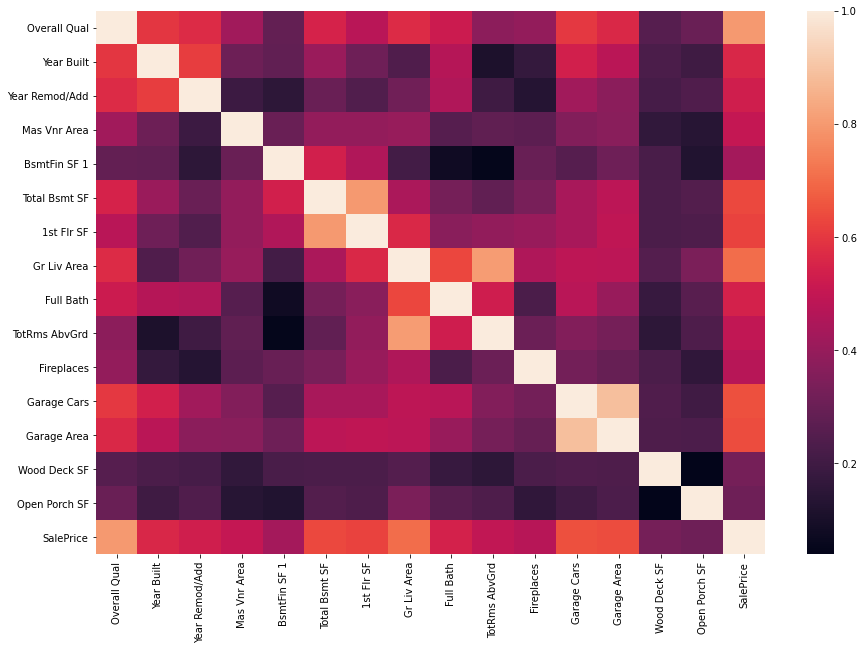

In [21]:
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(data_num[num_features].corr())

In [22]:
#Preference for continous variables
columns_collinearity= ["TotRms AbvGrd", "Garage Cars", "Total Bsmt SF"]

In [23]:
num_features = num_features.drop(columns_collinearity)


In [24]:
data_num[num_features]

,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,1st Flr SF,Gr Liv Area,Full Bath,Fireplaces,Garage Area,Wood Deck SF,Open Porch SF,SalePrice
0,6,1960,1960,112.0,639.0,1656,1656,1,2,528.0,210,62,215000
1,5,1961,1961,0.0,468.0,896,896,1,0,730.0,140,0,105000
2,6,1958,1958,108.0,923.0,1329,1329,1,0,312.0,393,36,172000
3,7,1968,1968,0.0,1065.0,2110,2110,2,2,522.0,0,0,244000
4,5,1997,1998,0.0,791.0,928,1629,2,1,482.0,212,34,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,6,1984,1984,0.0,819.0,1003,1003,1,0,588.0,120,0,142500
2926,5,1983,1983,0.0,301.0,902,902,1,0,484.0,164,0,131000
2927,5,1992,1992,0.0,337.0,970,970,1,0,0.0,80,32,132000
2928,5,1974,1975,0.0,1071.0,1389,1389,1,1,418.0,240,38,170000


In [25]:
num_features

Index(['Overall Qual', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', '1st Flr SF', 'Gr Liv Area', 'Full Bath', 'Fireplaces',
       'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'SalePrice'],
      dtype='object')

### Searching for low variance variables

In [26]:
data_scale = data_num[num_features].copy()

In [27]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_scale)

In [28]:
data_scale = pd.DataFrame(data_scaled, columns=data_scale.columns)

In [29]:
num_variance = data_scale.var().sort_values()

In [30]:
num_variance

BsmtFin SF 1      0.006516
1st Flr SF        0.006775
Wood Deck SF      0.007874
Open Porch SF     0.008272
Gr Liv Area       0.009070
SalePrice         0.011585
Mas Vnr Area      0.012465
Full Bath         0.019109
Garage Area       0.020914
Overall Qual      0.024580
Fireplaces        0.026238
Year Built        0.048035
Year Remod/Add    0.120875
dtype: float64

In [31]:
#Selecting low variance ==0.0
low_variance = num_variance.index[:5]

In [32]:
low_variance

Index(['BsmtFin SF 1', '1st Flr SF', 'Wood Deck SF', 'Open Porch SF',
       'Gr Liv Area'],
      dtype='object')

In [33]:
#Updating num_features
num_features = num_features.drop(low_variance)

## Categorical

In [34]:
data_cat.head()

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Paved Drive,Sale Type,Sale Condition
0,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,Plywood,Stone,TA,TA,CBlock,TA,Gd,Gd,BLQ,Unf,GasA,Fa,Y,SBrkr,TA,Typ,P,WD,Normal
1,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,Rec,LwQ,GasA,TA,Y,SBrkr,TA,Typ,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,Y,WD,Normal
3,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,BrkFace,None,Gd,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Ex,Typ,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Gd,Y,SBrkr,TA,Typ,Y,WD,Normal


In [67]:
## Searching for columns with too many categories(avoing too many dummy variables)
cat_features = []
cat_drop = []

for col in data_cat.columns:
    if len(data_cat[col].value_counts().index) < 10:
        cat_features.append(col)
    else:
        cat_drop.append(col)

In [68]:
cat_drop

['Neighborhood', 'Exterior 1st', 'Exterior 2nd', 'Sale Type']

In [69]:
cat_features

['MS Zoning',
 'Street',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land Slope',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Heating',
 'Heating QC',
 'Central Air',
 'Kitchen Qual',
 'Functional',
 'Paved Drive',
 'Sale Condition']

In [ ]:
### Searching for columns with Data Leakage about Sale/Sale Price

sale_data_leakage = ["Sale Condition"]

# Final Datasets

In [36]:
data_num[num_features]

,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,Full Bath,Fireplaces,Garage Area,SalePrice
0,6,1960,1960,112.0,1,2,528.0,215000
1,5,1961,1961,0.0,1,0,730.0,105000
2,6,1958,1958,108.0,1,0,312.0,172000
3,7,1968,1968,0.0,2,2,522.0,244000
4,5,1997,1998,0.0,2,1,482.0,189900
...,...,...,...,...,...,...,...,...
2925,6,1984,1984,0.0,1,0,588.0,142500
2926,5,1983,1983,0.0,1,0,484.0,131000
2927,5,1992,1992,0.0,1,0,0.0,132000
2928,5,1974,1975,0.0,1,1,418.0,170000


In [ ]:
# Overall column is a categorical one, let´s change it to the categorical dataset so we can perform proper encoding

overall = data_num['Overall'].copy()



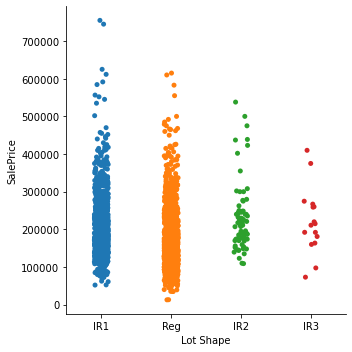

In [37]:
sns.catplot(x="Lot Shape", y= "SalePrice", data=data)

# Predictions

In [38]:
def train_and_test(df):
    train = df.iloc[:1460]
    test = df.iloc[1460:]

    train_x = train.select_dtypes(include=['integer', 'float']).drop("SalePrice", axis=1)
    train_y = train['SalePrice']

    test_x = test.select_dtypes(include=['integer', 'float']).drop("SalePrice", axis=1)
    test_y = test['SalePrice']

    lr = LinearRegression()
    lr.fit(train_x, train_y)

    predictions = lr.predict(test_x)

    rmse = np.sqrt(mean_squared_error(test_y, predictions))

    return rmse

In [39]:
df = select_features(data)
train_and_test(df)

NameError: name 'select_features' is not defined

# Feature Selection

In [52]:
def transform_features(data):
    null_values = data.isna().sum()* 100 / len(data)
    mask =  null_values > 25
    features_to_drop = null_values[mask].index
    df = data.drop(features_to_drop, axis=1)

    return df

In [53]:
def train_and_test(df):
    train = df.iloc[:1460]
    test = df.iloc[1460:]

    train_x = train.select_dtypes(include=['int', 'float']).drop("SalePrice", axis=1)
    train_y = train['SalePrice']

    test_x = train.select_dtypes(include=['int', 'float']).drop("SalePrice", axis=1)
    test_y = train['SalePrice']

    lr = LinearRegression()
    lr.fit(selected_features, train_y)

    predictions = lr.predict(test[selected_features])

